In [9]:
pip install pymupdf


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
!pip install nltk
!pip install scikit-learn
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:


import fitz  # PyMuPDF
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt  # Make sure this is imported



In [19]:
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page in doc:
        text += page.get_text("text")
    return text

In [20]:
# Step 2: Define a list of predefined skills (customize this as needed)
predefined_skills = [
    'Python', 'Java', 'C++', 'JavaScript', 'HTML', 'CSS', 'SQL', 'Machine Learning', 'Data Science', 'Django', 'Flask', 'React', 'Node.js', 'AWS', 'GCP'
]

# Step 3: Function to extract skills from resume text using NLP
def extract_skills(resume_text, predefined_skills):
    resume_text = resume_text.lower()
    extracted_skills = [skill for skill in predefined_skills if skill.lower() in resume_text]
    return extracted_skills


Resume Extracted Text: DEEPAK GANGWAR
Ó +91 6398237345
R deepakgangwar2003@gmail.com
¯ LinkedIn
 Github
/ Portfolio
Education
Indian Institute of Information Technology, Kota
2022 - 2026
B.Tech in Computer Science & Engineering
7.67/10 CGPA
Projects
StudySphere: Online Learning Management System Website
Github W
• Developed a full-stack Learning Management System using JavaScript, React.js, MongoDB, Express.js, Node.js,
Tailwind CSS, and Shadcn UI.
• Configured Stripe for payment processing, simulating end-to-end flow for 5+ legal service types.
• Designed a mobile-first, intuitive UI using Tailwind CSS, tested across 3+ device resolutions to ensure consistent
experience on smaller screens.
• Secured user access with JWT authentication and connected Stripe for 10+ end-to-end payment scenarios.
Travel World: Full-Stack Tour and Travel Booking Platform
Github W
• Built a full-stack travel booking platform using JavaScript, React.js, MongoDB, Express.js, Node.js, and
Bcrypt.js for secure

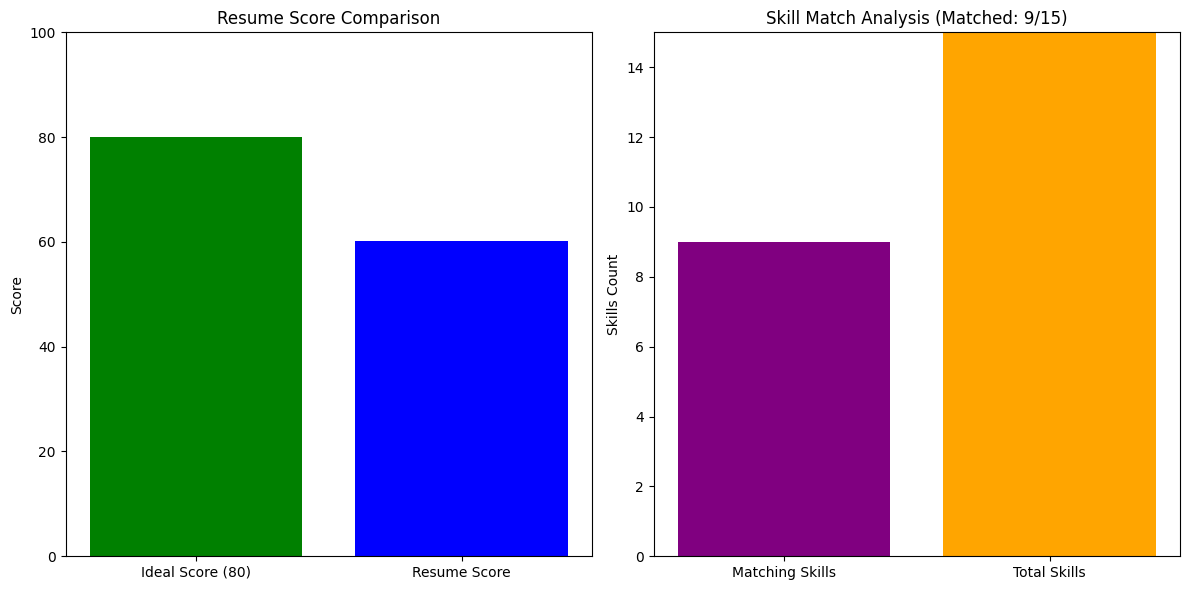

In [25]:
# Step 4: Function to compute a similarity score (based on skills match)
def compute_similarity_score(extracted_skills, predefined_skills):
    # Convert both skill sets into strings for comparison
    resume_skills_str = ' '.join(extracted_skills)
    predefined_skills_str = ' '.join(predefined_skills)

    # Convert to TF-IDF representation and compute cosine similarity
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([resume_skills_str, predefined_skills_str])
    similarity_matrix = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
    
    return similarity_matrix[0][0]  # Return the similarity score

# Step 5: Final Resume Score (scale 0-100)
def final_score(similarity_score):
    return similarity_score * 100

# Function to plot the resume score comparison
def plot_score(ideal_score, resume_score, matching_skills_count, total_skills_count):
    plt.figure(figsize=(12, 6))

    # Bar plot for comparison of ideal and resume score
    plt.subplot(1, 2, 1)  # First subplot
    plt.bar(['Ideal Score (80)', 'Resume Score'], [ideal_score, resume_score], color=['green', 'blue'])
    plt.ylim(0, 100)
    plt.ylabel('Score')
    plt.title('Resume Score Comparison')

    # Bar plot for skill match analysis
    plt.subplot(1, 2, 2)  # Second subplot
    plt.bar(['Matching Skills', 'Total Skills'], [matching_skills_count, total_skills_count], color=['purple', 'orange'])
    plt.ylim(0, total_skills_count)
    plt.ylabel('Skills Count')
    plt.title(f'Skill Match Analysis (Matched: {matching_skills_count}/{total_skills_count})')

    plt.tight_layout()
    plt.show()

# Step 6: Taking input PDF and calculating score
pdf_path = input("Enter the path to the resume PDF: ")
pdf_path = pdf_path.strip().replace("\\", "/")  # Handle Windows paths

resume_text = extract_text_from_pdf(pdf_path)
print("Resume Extracted Text:", resume_text[:1000])  # Print first 1000 characters

extracted_skills = extract_skills(resume_text, predefined_skills)
print("Extracted Skills from Resume:", extracted_skills)

# Count the number of matched skills
matching_skills_count = len(extracted_skills)
total_skills_count = len(predefined_skills)

similarity_score = compute_similarity_score(extracted_skills, predefined_skills)
print("Resume Skill Match Score:", similarity_score)

score = final_score(similarity_score)
print("Final Resume Score (0-100):", score)

# Plot the result with enhanced graph
ideal_score = 80
plot_score(ideal_score, score, matching_skills_count, total_skills_count)
